# 自编码器对mnist图片降噪

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Input
from keras.optimizers import *
import random

D:\study\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 数据预处理

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_train.astype('float32') / 255.

noised_X_train = X_train.copy()
noised_X_test = X_test.copy()

生成用于训练的噪化后的数据

In [3]:
noise_rate = 0.6

noised_X_train = noised_X_train.reshape(-1, 1, 28, 28)
noised_X_test = noised_X_test.reshape(-1, 1, 28, 28)

random.seed(10)
for i in range(noised_X_train.shape[0]):
    noised_X_train[i] += noise_rate * np.random.randn(*noised_X_train[0].shape)
    noised_X_train[i] = np.clip(noised_X_train[i], 0.0, 1.0)

In [4]:
random.seed(10)
for j in range(noised_X_test.shape[0]):
    noised_X_test[j] += noise_rate * np.random.randn(*noised_X_test[0].shape)
    noised_X_test[j] = np.clip(noised_X_test[j], 0.0, 1.0)

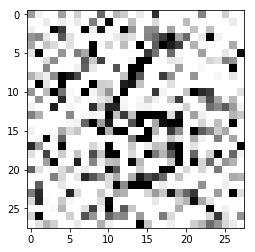

In [5]:
plt.imshow(noised_X_train[18].reshape(28,28), cmap='Greys')

不知为何noised_X_train 和noised_X_test相比, 后者的噪点太大, 所以我把noised_X_train分成了训练集和测试集

In [6]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

## 建模

In [7]:
model = Sequential()
input_layer = Input(shape=(1, 28, 28))

model = Convolution2D(32, 5, 5, 
                       border_mode='same')(input_layer)

model = MaxPooling2D( pool_size=(2,2),   #每次处理 2X2 的方格
                        strides=(2,2),    # 这个 2X2 的方格移动的步长
                        border_mode='same')(model)

model = Convolution2D(64, 5, 5, border_mode='same')(model)
model = MaxPooling2D(pool_size=(2,2), border_mode='same', strides=(2,2))(model)

model = Convolution2D(128, 5, 5, border_mode='same')(model)
model = MaxPooling2D(pool_size=(2,2), border_mode='same', strides=(2,2))(model)

model = Flatten()(model)

model = Dense(784)(model)     #输出层

picture_model = Model(input_layer, model)

picture_model.compile(optimizer=Adam(lr=0.01), loss='MSE', metrics=['mse'])

picture_model.fit(noised_X_train[:50000], X_train[:50000], epochs=2)

D:\study\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), padding="same")`
  """
D:\study\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")`
  if __name__ == '__main__':
D:\study\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
D:\study\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")`
  if sys.path[0] == '':
D:\study\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), padding="same")`
  
D:\study\Anaconda\lib\s

Epoch 1/2
50000/50000 [==============================] - 57s 1ms/step - loss: 0.0486 - mean_squared_error: 0.0486
Epoch 2/2
50000/50000 [==============================] - 61s 1ms/step - loss: 0.0249 - mean_squared_error: 0.0249


检验模型效果

raw picture
noised picture
降噪后的图片


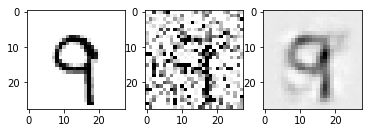

In [15]:
picture = 50003  #选择要对比的图片

output = picture_model.predict(noised_X_train[picture].reshape(-1, 1, 28, 28))

plt.subplot(1, 3, 1,)
print('raw picture')
plt.imshow(X_train[picture].reshape(28, 28), cmap='Greys')

plt.subplot(1, 3, 2)
print('noised picture')
plt.imshow(noised_X_train[picture].reshape(28, 28), cmap='Greys')

plt.subplot(1, 3, 3)
print('降噪后的图片')
plt.imshow(output.reshape(28, 28), cmap='Greys')

效果很不错诶